In [1]:
!pip install pandas scikit-learn matplotlib

In [2]:
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# 1. Đọc dữ liệu từ file CSV
df = pd.read_csv('E:/MonHoc/IOT/Project/001/output_data_with_constraint_2_decimal.csv')

In [3]:
# 1. Tiền xử lý dữ liệu
# Chuyển cột TAG thành giá trị số (Label Encoding)
label_encoder = LabelEncoder()
df['TAG'] = label_encoder.fit_transform(df['TAG'])

# Tách dữ liệu thành các đặc trưng (features) và nhãn (labels)
X = df.drop(columns=['TAG'])  # X là các cột đặc trưng
y = df['TAG']  # y là cột TAG đã mã hóa

In [4]:
# 2. Cân bằng dữ liệu với SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [5]:
# 3. Chuẩn hóa dữ liệu (Standardization)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)


In [6]:
# 4. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# 5. Tối ưu tham số mô hình (Hyperparameter Tuning) với GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# In tham số tối ưu
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [7]:
# 6. Huấn luyện lại mô hình với tham số tối ưu
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [8]:
# 7. Dự đoán và đánh giá mô hình
y_pred = best_rf_model.predict(X_test)

In [9]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized Accuracy: {accuracy * 100:.2f}%')

# In báo cáo chi tiết về độ chính xác
print(classification_report(y_test, y_pred))

Optimized Accuracy: 41.31%
              precision    recall  f1-score   support

           0       0.37      0.44      0.40        68
           1       0.51      0.36      0.42        85
           2       0.39      0.45      0.42        60

    accuracy                           0.41       213
   macro avg       0.42      0.42      0.41       213
weighted avg       0.43      0.41      0.41       213



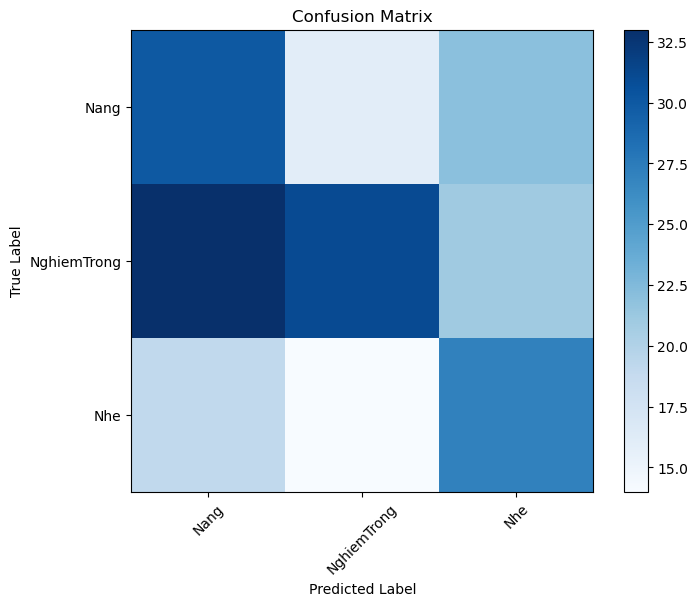

In [10]:
# 8. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = range(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

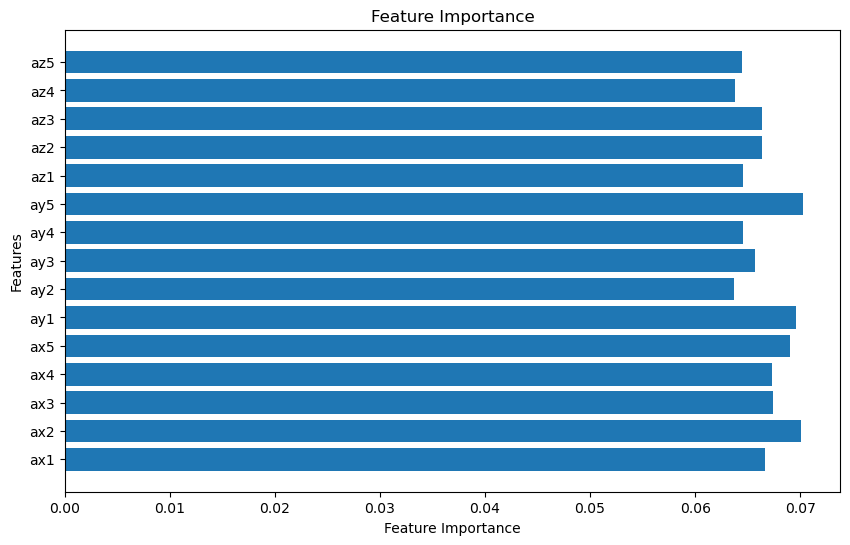

In [11]:
# 9. Vẽ biểu đồ tầm quan trọng của các đặc trưng
feature_importances = best_rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [12]:
# Giả sử đây là dữ liệu thực tế (hoặc dữ liệu giả)
new_data = pd.read_csv('E:/MonHoc/IOT/Project/001/more_infor_output.csv')
# Chuẩn hóa dữ liệu (tương tự như đã làm với dữ liệu huấn luyện)
new_data_scaled = scaler.transform(new_data)

# Dự đoán giá trị của TAG
predictions = best_rf_model.predict(new_data_scaled)

# Chuyển đổi các giá trị số dự đoán thành tên lớp (Nhe, Nang, Nghiem)
predicted_tags = label_encoder.inverse_transform(predictions)

# Thêm cột TAG vào dữ liệu mới
new_data['TAG'] = predicted_tags

# Xuất dữ liệu kết quả ra CSV
new_data.to_csv('predicted_tags.csv', index=False)

# In ra dữ liệu mới với cột TAG
print(new_data)

    ax1   ax2   ax3   ax4   ax5   ay1   ay2   ay3   ay4   ay5   az1   az2  \
0 -0.93 -0.93 -0.94 -0.92 -0.94 -0.03 -0.03 -0.03 -0.03 -0.02 -0.21 -0.21   
1 -0.93 -0.93 -0.93 -0.94 -0.92 -0.03 -0.03 -0.03 -0.03 -0.03 -0.20 -0.21   
2 -0.93 -0.93 -0.93 -0.93 -0.94 -0.03 -0.03 -0.03 -0.03 -0.03 -0.22 -0.20   
3 -0.93 -0.93 -0.93 -0.93 -0.93 -0.03 -0.03 -0.03 -0.03 -0.03 -0.21 -0.22   
4 -0.94 -0.93 -0.93 -0.93 -0.93 -0.03 -0.03 -0.03 -0.03 -0.03 -0.21 -0.21   
5 -0.93 -0.94 -0.93 -0.93 -0.93 -0.03 -0.03 -0.03 -0.03 -0.03 -0.21 -0.21   

    az3   az4   az5   TAG  
0 -0.20 -0.23 -0.20  Nang  
1 -0.21 -0.20 -0.23  Nang  
2 -0.21 -0.21 -0.20  Nang  
3 -0.20 -0.21 -0.21  Nang  
4 -0.22 -0.20 -0.21  Nang  
5 -0.21 -0.22 -0.20  Nang  
